# Function to download the data

page 46: calling the fetch_housing_data() function below will :

*create directorys datasets->housing in the workspace


*download tgz file in housing folder


*extract the housing csv in housing folder

In [12]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path, "hg.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [13]:
fetch_housing_data()

In [14]:
## Lets make a funtion to load the data using Panda

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [15]:
housing = load_housing_data()

In [16]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


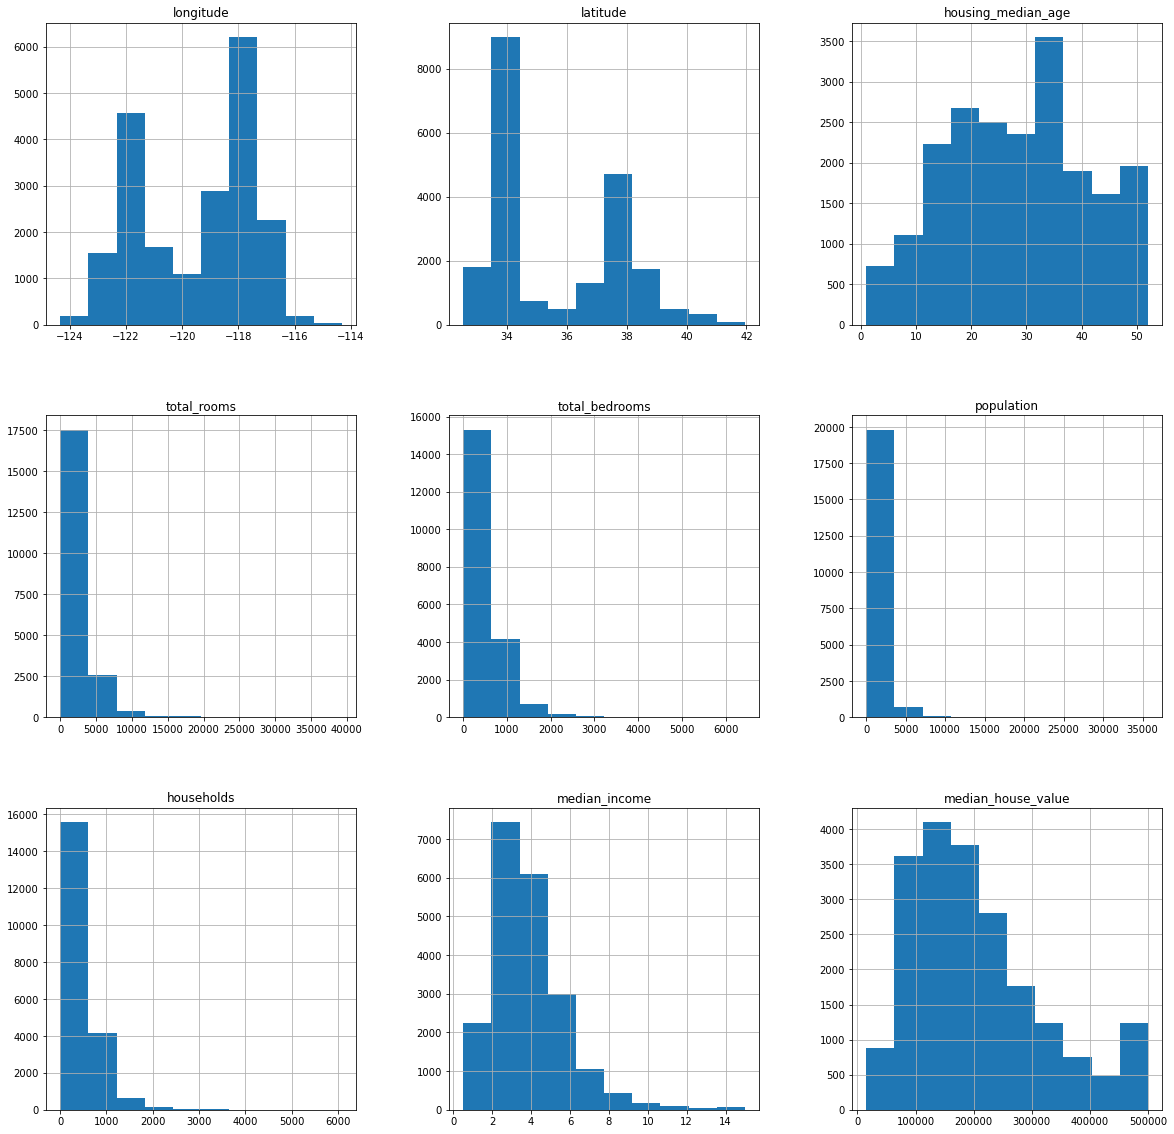

In [26]:
# checking the numerical data using the histogram
import matplotlib.pyplot as plt
%matplotlib inline

housing.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

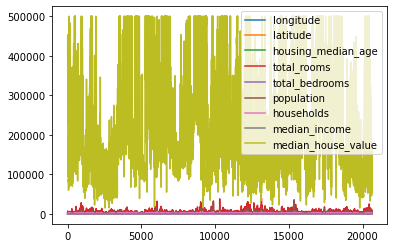

In [28]:
housing.plot()

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
train_set, test_set = train_test_split(housing,test_size=0.2, random_state=42)

In [34]:
len(train_set)

16512

In [35]:
len(test_set)

4128

In [37]:
len(train_set)+len(test_set)

20640

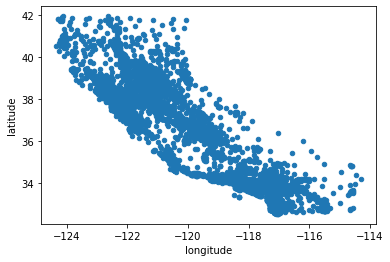

In [39]:
housing.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

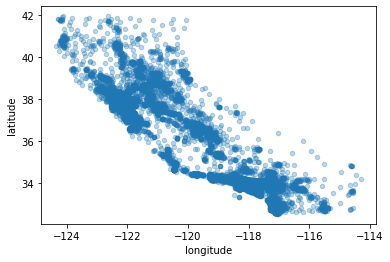

In [41]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3)
plt.show(
)

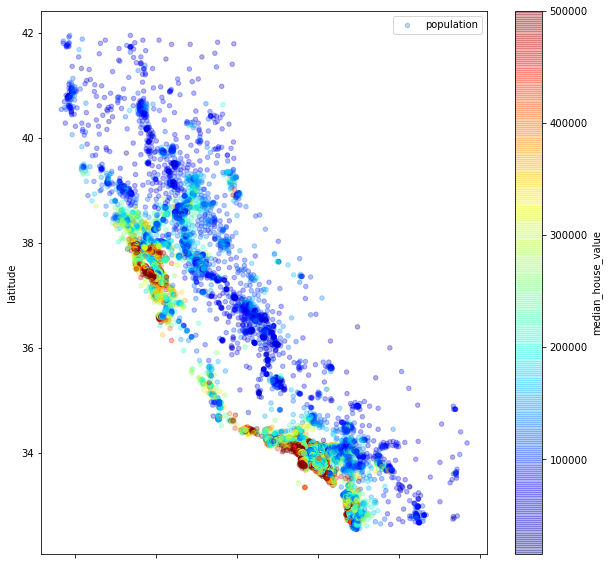

In [48]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,figsize=(10,10),label='population',c='median_house_value',cmap='jet')
plt.show()

In [49]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


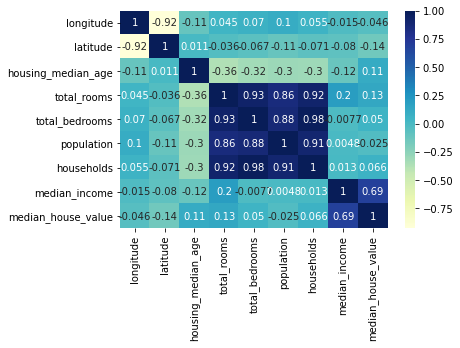

In [63]:
# Lets create  a heat map for the corrplot as the matrix of numbers is not intuitive
import seaborn as sns

fig,ax = plt.subplots()
ax = sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

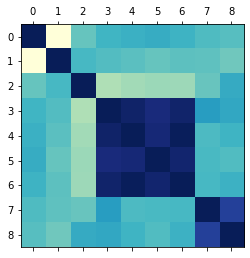

In [89]:
#Another way to plot confusion matrix is to use Matplotlib's matplot() funtion
#This can be used to plot any matrix

plt.matshow(corr_matrix,cmap='YlGnBu')

In [64]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [65]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### Data Cleaning

Scikit-Learn provides a handy class to take care of missing values: SimpleImputer

Following process can be used for Numerical values:

1) import the imputer

2) set up the imputing startegy lets say 'median'for numerical quantities

3) drop the categorical attributes

4) set up the imputer instance using the fit() method

5) imputer will simply compute the median of each attribute and store it in a variable 'statistics_'

6) now we can use the imputer to transform the data 

7) put the the data into dataframe since transform will return the ndarray




In [80]:
#import 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

#Since the median can only work on numerical attributes , need to create a copy of dataframe without the text attribute
#ocean_proximity

housing_num = housing.drop("ocean_proximity",axis=1)

# set up the imputer instance using the fit method
imputer.fit(housing_num)



SimpleImputer(strategy='median')

In [76]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [81]:
# we can check this 

housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [82]:
# Transform using imputer
X = imputer.transform(housing_num)

In [84]:
# the result is a plain NumPy array containing the transformed features. Lets put this back to DataFrame

housing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

In [85]:
housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


### Handling the text or categorical attributes

ocean_proximity is the categorcial variable. Since in machine learning we cannot work directly with text : we'll have to change these into numbers

Following is the process to do this:

1) import ScitkitLearns OneHotEncoder

In [90]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [113]:
housing_cat = housing[['ocean_proximity']]

In [114]:
housing_cat.head(2)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY


In [96]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [104]:
cat_encoder.fit(housing_cat)

OneHotEncoder()

In [107]:
housing_cat_1hot=cat_encoder.transform(housing_cat)

In [109]:
housing_cat_1hot[0].toarray()[0]

array([0., 0., 0., 1., 0.])

In [141]:
housing = train_set.drop("median_house_value",axis=1)
housing_label = train_set["median_house_value"].copy()

# Transformation Pipelines

So far we have handled the categorical variables and numerical variables separately where one was imputed as a median and other was transformed as OneHot.

It would be convinient if we could do this with a single transformer pipeline

Scikit learn has introduced 'ColumnTransformer' for this

Lets see how we can transform in one go

In [142]:
from sklearn.compose import ColumnTransformer

#lets define the numerical and categorical attributes separetly as different transformation is needed on them:
# one has to be imputed and other will be OneHotEncoded

num_attributes = ["total_bedrooms"]
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num',SimpleImputer(strategy="median"),num_attributes),
    ('cat',OneHotEncoder(),cat_attributes),
])

transformed_housing = full_pipeline.fit_transform(housing)

In [143]:
## Fitting the model

from sklearn.linear_model import LinearRegression


In [144]:
lin_reg = LinearRegression()

In [145]:
lin_reg.fit(transformed_housing,housing_label)

LinearRegression()

In [146]:
housing_test = test_set.drop("median_house_value",axis=1)
housing_label_test = test_set["median_house_value"].copy()

In [147]:
num_attributes = ["total_bedrooms"]
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ('num',SimpleImputer(strategy="median"),num_attributes),
    ('cat',OneHotEncoder(),cat_attributes),
])

transformed_housing_test = full_pipeline.fit_transform(housing_test)

In [148]:
lin_reg.score(transformed_housing_test,housing_label_test)

0.2485008890115128

In [149]:
#checking score with RandomForestRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
forest_reg = RandomForestRegressor()

In [152]:
forest_reg.fit(transformed_housing,housing_label)

RandomForestRegressor()

In [153]:
forest_reg.score(transformed_housing_test,housing_label_test)

0.0813055696806374

In [154]:
#Hence Random Forest Regressor is much better!!!

In [155]:
#saving a model

import joblib

In [156]:
joblib.dump(forest_reg,"HousingData_model.pkl")

['HousingData_model.pkl']